In [37]:
DATA_DIR = "datasets/raw_orig"
DATA_FILE = f"{DATA_DIR}/all_datasets.csv"

MODEL_DIR = "models"
FASTTEXT_MODEL_DIR = f"{MODEL_DIR}/fasttext"

In [38]:
import pandas as pd
df = pd.read_csv(DATA_FILE)
df

,issuekey,title,description,storypoint
0,GHS-1271,As a JIRA Administrator I would like to be abl...,NaN,5
1,JSW-1271,As a JIRA Administrator I would like to be abl...,NaN,5
2,GHS-1681,Generic webwork aliases may clash with other p...,Some web work actions have commands that have ...,5
3,JSW-1681,Generic webwork aliases may clash with other p...,Some web work actions have commands that have ...,5
4,GHS-1819,"Add text to the Agile Gadget ""Invalid Project""...","When the error is ""Invalid Project"" add detail...",2
...,...,...,...,...
23322,TIMOB-23699,"iOS Media.showCamera ""Temp"" file issue",h6. Issue Description Video is recorded an...,2
23323,TIMOB-23701,iOS: close() is applied to multiple window vie...,*This is a regression from 5.3.1.GA* It was...,3
23324,TIMOB-23702,Windows: Implement Titanium.Network.Socket,Implement {{Titanium.Network.Socket}} methods ...,8
23325,TIMOB-23708,Hyperloop: Android aar without asset folder fa...,Including an .aar file which doesn't have an a...,1


In [39]:
# Descriptive statistics
df.describe(include='all')

,issuekey,title,description,storypoint
count,23327,23327,21092,23327.000000
unique,23313,23089,20805,NaN
top,DM-22,Export babili translations into trunk of SVN,See https://confluence.lsstcorp.org/display/DM...,NaN
freq,3,21,13,NaN
mean,NaN,NaN,NaN,6.215116
std,NaN,NaN,NaN,10.005808
min,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,2.000000
50%,NaN,NaN,NaN,4.000000
75%,NaN,NaN,NaN,8.000000


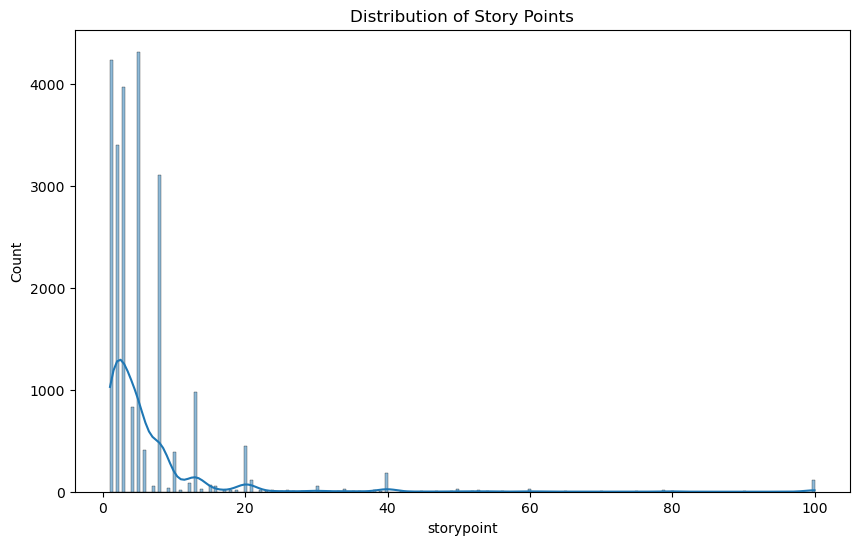

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
# Data visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['storypoint'], kde=True)
plt.title('Distribution of Story Points')
plt.show()

In [41]:
# Drop the 'issuekey' column
df = df.drop(['issuekey'], axis=1)
# Check the first few rows of the updated dataframe
df.head()

,title,description,storypoint
0,As a JIRA Administrator I would like to be abl...,NaN,5
1,As a JIRA Administrator I would like to be abl...,NaN,5
2,Generic webwork aliases may clash with other p...,Some web work actions have commands that have ...,5
3,Generic webwork aliases may clash with other p...,Some web work actions have commands that have ...,5
4,"Add text to the Agile Gadget ""Invalid Project""...","When the error is ""Invalid Project"" add detail...",2


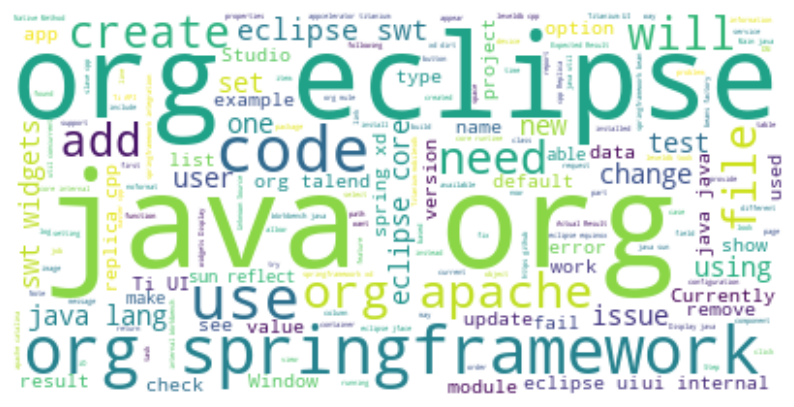

In [42]:
from wordcloud import WordCloud, STOPWORDS
# Combine all titles and descriptions into one text
text = ' '.join(df['title'].dropna().tolist() + df['description'].dropna().tolist())
# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)
# Display the generated image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
# Create a CountVectorizer object
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
# Fit and transform the 'description' column
X = vectorizer.fit_transform(df['description'].dropna())
# Create a dataframe from the transformed data
word_count = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
# Add the 'storypoint' column to the dataframe
word_count['storypoint'] = df['storypoint']
# Calculate the correlation between the word count and 'storypoint'
correlation = word_count.corr()['storypoint'].sort_values(ascending=False)
correlation

storypoint      1.000000
add_to_log      0.069414
moodle          0.066475
php             0.060118
mod             0.053398
                  ...   
ti             -0.031883
run            -0.032494
createwindow   -0.032675
win            -0.033037
like           -0.040069
Name: storypoint, Length: 1001, dtype: float64

In [44]:
from textblob import TextBlob

# Function to get the polarity of text
def get_polarity(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        return None

# Apply function to the 'description' column
df['sentiment'] = df['description'].apply(get_polarity)

# Display the dataframe with the new 'sentiment' column
df.head()

,title,description,storypoint,sentiment
0,As a JIRA Administrator I would like to be abl...,NaN,5,NaN
1,As a JIRA Administrator I would like to be abl...,NaN,5,NaN
2,Generic webwork aliases may clash with other p...,Some web work actions have commands that have ...,5,0.063889
3,Generic webwork aliases may clash with other p...,Some web work actions have commands that have ...,5,0.063889
4,"Add text to the Agile Gadget ""Invalid Project""...","When the error is ""Invalid Project"" add detail...",2,0.000000


In [45]:
# Drop rows with NaN in the 'description' column
df_clean = df.dropna(subset=['description'])
# Apply function to the 'description' column of the cleaned dataframe
df_clean['sentiment'] = df_clean['description'].apply(get_polarity)
# Display the cleaned dataframe with the new 'sentiment' column
df_clean.head()

C:\Users\hawkp\AppData\Local\Temp\ipykernel_12260\1539991893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sentiment'] = df_clean['description'].apply(get_polarity)


,title,description,storypoint,sentiment
2,Generic webwork aliases may clash with other p...,Some web work actions have commands that have ...,5,0.063889
3,Generic webwork aliases may clash with other p...,Some web work actions have commands that have ...,5,0.063889
4,"Add text to the Agile Gadget ""Invalid Project""...","When the error is ""Invalid Project"" add detail...",2,0.000000
5,"Add text to the Agile Gadget ""Invalid Project""...","When the error is ""Invalid Project"" add detail...",2,0.000000
6,Greenhopper ranking field is not displayed cor...,When using Greenhopper ranking field in conjun...,20,0.000000


In [46]:
# Drop rows with NaN in any column
df_clean = df.dropna()
# Reset the index of the cleaned dataframe
df_clean.reset_index(drop=True, inplace=True)
# Display the cleaned dataframe
df_clean.head()

,title,description,storypoint,sentiment
0,Generic webwork aliases may clash with other p...,Some web work actions have commands that have ...,5,0.063889
1,Generic webwork aliases may clash with other p...,Some web work actions have commands that have ...,5,0.063889
2,"Add text to the Agile Gadget ""Invalid Project""...","When the error is ""Invalid Project"" add detail...",2,0.000000
3,"Add text to the Agile Gadget ""Invalid Project""...","When the error is ""Invalid Project"" add detail...",2,0.000000
4,Greenhopper ranking field is not displayed cor...,When using Greenhopper ranking field in conjun...,20,0.000000


In [47]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hawkp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hawkp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Create a deep copy of the original dataframe
df_cleaned = df_clean.copy()

# Combine 'title' and 'description' columns into a single column
df_cleaned['text'] = df_cleaned['title'] + ' ' + df_cleaned['description']

# Drop the 'title' and 'description' columns
df_cleaned.drop(['title', 'description'], axis=1, inplace=True)

# Function to clean text
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove whitespaces
    text = text.strip()

    # Remove {code} tags
    text = re.sub(r'\{code[^\}]*\}[^\{]*\{code\}', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Tokenize text and remove stopwords and punctuations
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

    return ' '.join(tokens)

# Apply function to the 'text' column
df_cleaned['text'] = df_cleaned['text'].apply(clean_text)

# Display the cleaned dataframe
df_cleaned.head()

C:\Users\hawkp\AppData\Local\Temp\ipykernel_12260\2624240021.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
c:\Users\hawkp\miniconda3\envs\agile\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


,storypoint,sentiment,text
0,5,0.063889,Generic webwork aliases may clash plugins Some...
1,5,0.063889,Generic webwork aliases may clash plugins Some...
2,2,0.000000,Add text Agile Gadget Invalid Project message ...
3,2,0.000000,Add text Agile Gadget Invalid Project message ...
4,20,0.000000,Greenhopper ranking field displayed correctly ...


In [49]:
# Create classes from 'storypoint' column
def classify_storypoint(storypoint):
    if storypoint <= 10:
        return 0  # easy
    elif storypoint <= 20:
        return 1  # medium
    else:
        return 2  # complex

df_cleaned['class'] = df_cleaned['storypoint'].apply(classify_storypoint)

# Display the dataframe
df_cleaned.head()

,storypoint,sentiment,text,class
0,5,0.063889,Generic webwork aliases may clash plugins Some...,0
1,5,0.063889,Generic webwork aliases may clash plugins Some...,0
2,2,0.000000,Add text Agile Gadget Invalid Project message ...,0
3,2,0.000000,Add text Agile Gadget Invalid Project message ...,0
4,20,0.000000,Greenhopper ranking field displayed correctly ...,1


In [50]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_cleaned[df_cleaned['class']==0]
df_minority_1 = df_cleaned[df_cleaned['class']==1]
df_minority_2 = df_cleaned[df_cleaned['class']==2]

# Upsample minority class
df_minority_upsampled_1 = resample(df_minority_1,
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

df_minority_upsampled_2 = resample(df_minority_2,
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled_1, df_minority_upsampled_2])

# Display new class counts
df_upsampled['class'].value_counts()

class
0    18775
1    18775
2    18775
Name: count, dtype: int64

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# Fit and transform the vectorizer on the text column
tfidf = tfidf_vectorizer.fit_transform(df_upsampled['text'])

# Display the shape of the transformed data
tfidf.shape

(56325, 1000)

In [52]:
from sklearn.model_selection import train_test_split

# Split the dataset into training, testing and validation data
X = tfidf
y = df_upsampled['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Display the shapes of the splits
X_train.shape, X_val.shape, X_test.shape

((33795, 1000), (11265, 1000), (11265, 1000))

Accuracy:  0.7282734132268087
              precision    recall  f1-score   support

           0       0.71      0.67      0.69      3768
           1       0.68      0.65      0.66      3754
           2       0.78      0.86      0.82      3743

    accuracy                           0.73     11265
   macro avg       0.73      0.73      0.73     11265
weighted avg       0.73      0.73      0.73     11265



Text(95.72222222222221, 0.5, 'Truth')

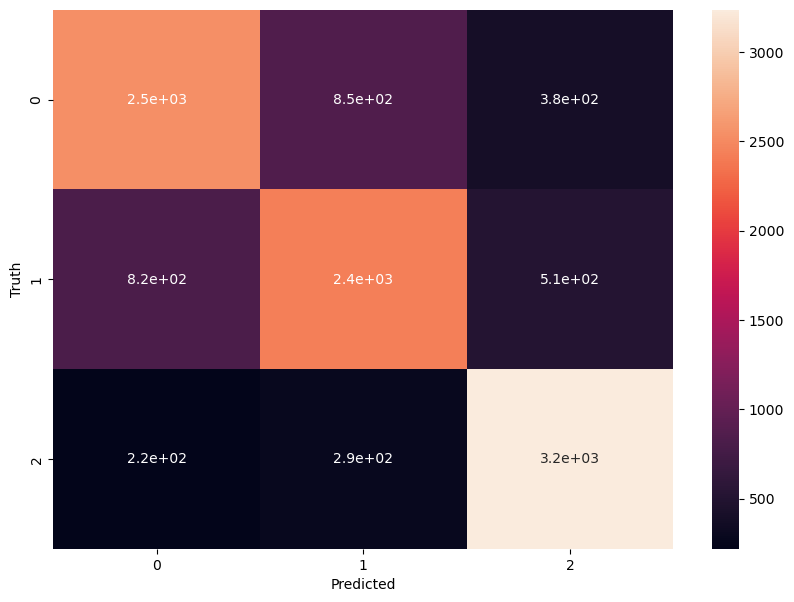

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=0)

# Train the model
model.fit(X_train, y_train)

# Predict the validation set results
y_test_pred = model.predict(X_test)

# Print accuracy score
print('Accuracy: ', accuracy_score(y_test, y_test_pred))

# Print classification report
print(classification_report(y_test, y_test_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### Till here ChatGPT created notebook

In [58]:
df_upsampled.to_csv('cleaned.csv')

In [55]:
import fasttext

model = fasttext.train_unsupervised()
model.save_model(f"{FASTTEXT_MODEL_DIR}/fasttext_supervised_model.bin")

TypeError: (): incompatible function arguments. The following argument types are supported:
    1. (self: fasttext_pybind.args, arg0: str) -> None

Invoked with: <fasttext_pybind.args object at 0x0000020888B6A830>, array([[0.        , 0.        , 0.        , ..., 0.        , 0.16058383,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.16058383,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
model.get_output_matrix().shape

(22507, 100)

In [ ]:
import torch
from torch import nn
from torch.optim import Adam
from torch.nn.functional import binary_cross_entropy_with_logits
from torch.utils.data import DataLoader, TensorDataset

# Define the model
class ConvNet(nn.Module):
    def __init__(self, input_shape):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv1d(input_shape[0], 32, 3, activation='relu')
        self.pool = nn.MaxPool1d(3)
        self.conv2 = nn.Conv1d(32, 64, 3, activation='relu')
        self.global_pool = nn.AdaptiveMaxPool1d(1)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(64, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.dropout(x)
        x = self.fc(x)
        return x

In [ ]:
# Assume train_vectors is a numpy array of FastText embeddings
train_vectors = # your code here
y_train = # your code here

# Convert to PyTorch tensors
train_vectors = torch.tensor(train_vectors, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

# Create a DataLoader
dataset = TensorDataset(train_vectors, y_train)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Create the model and optimizer
model = ConvNet(input_shape=(train_vectors.shape[1], 1))
optimizer = Adam(model.parameters())

In [ ]:
# Train the model
for epoch in range(10):
    for vectors, labels in data_loader:
        # Forward pass
        outputs = model(vectors)
        loss = binary_cross_entropy_with_logits(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [ ]:
# Print the model's architecture
print(model)